In [1]:
pip freeze > model_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, hinge_loss, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
data_mm_train_df = pd.read_csv('data_smin_mm_train_csv')
data_mm_test_df = pd.read_csv('data_mm_test_csv')
data_mm_val_df = pd.read_csv('data_mm_val_csv')

In [4]:
data_ss_train_df = pd.read_csv('data_smin_ss_train_csv')
data_ss_test_df = pd.read_csv('data_ss_test_csv')
data_ss_val_df = pd.read_csv('data_ss_val_csv')

In [5]:
data_log_train_df = pd.read_csv('data_smin_log_train_csv')
data_log_test_df = pd.read_csv('data_test_csv')
data_log_val_df = pd.read_csv('data_val_csv')

In [6]:
print(f"Data_train: {data_mm_train_df.shape}")
print(f"Data_test: {data_mm_test_df.shape}")
print(f"Data_val: {data_mm_val_df.shape}")

#Divide by 10 for the sample

Data_train: (296133, 9)
Data_test: (27782, 9)
Data_val: (55563, 9)


In [7]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [8]:
X_mm_train_sample, X_mm_test_sample, X_mm_val_sample, y_mm_train_sample, y_mm_test_sample, y_mm_val_sample = data_format(data_mm_train_df, data_mm_test_df, data_mm_val_df, 'sample', 20)
X_ss_train_sample, X_ss_test_sample, X_ss_val_sample, y_ss_train_sample, y_ss_test_sample, y_ss_val_sample = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, 'sample', 20)
X_log_train_sample, X_log_test_sample, X_log_val_sample, y_log_train_sample, y_log_test_sample, y_log_val_sample = data_format(data_log_train_df, data_log_test_df, data_log_val_df, 'sample', 20)

In [9]:
X_mm_train_sample.shape

(14806, 7)

In [10]:
X_ss_train, X_ss_test, X_ss_val, y_ss_train, y_ss_test, y_ss_val = data_format(data_ss_train_df, data_ss_test_df, data_ss_val_df, None, None)
X_mm_train, X_mm_test, X_mm_val, y_mm_train, y_mm_test, y_mm_val = data_format(data_mm_train_df, data_mm_test_df, data_mm_val_df, None, None)
X_log_train, X_log_test, X_log_val, y_log_train, y_log_test, y_log_val = data_format(data_log_train_df, data_log_test_df, data_log_val_df, None, None)

SVM model

In [11]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Feature selection

Used Pearson correlation to show where the highly correlated areas were, and removed anything above 0.8

In [12]:
adfasdf

NameError: name 'adfasdf' is not defined

<Axes: >

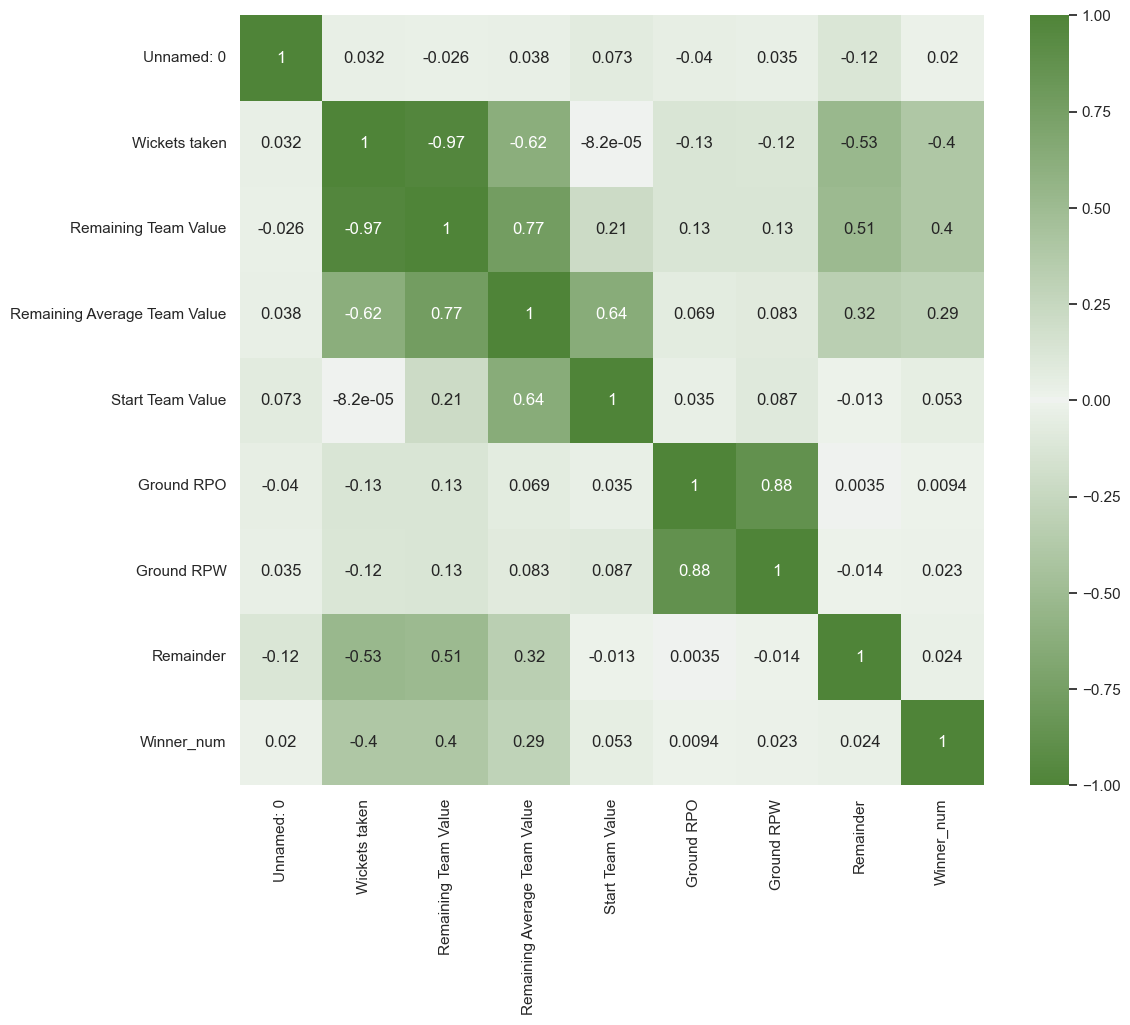

In [ ]:
corr_matrix = data_ss_train_df.corr(method = 'pearson')
sns.set(rc={'figure.figsize':(12,10)})
new_cmap = sns.diverging_palette(120, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=new_cmap, vmin=-1, vmax=1)

In [13]:
# Feature selection Correlation
data_ss_corr_train_df = data_ss_train_df.drop(columns=['Remaining Team Value', 'Ground RPO'])
data_ss_corr_test_df = data_ss_test_df.drop(columns=['Remaining Team Value', 'Ground RPO'])
data_ss_corr_val_df = data_ss_val_df.drop(columns=['Remaining Team Value', 'Ground RPO'])

X_ss_corr_train, X_ss_corr_test, X_ss_corr_val, y_ss_corr_train, y_ss_corr_test, y_ss_corr_val = data_format(data_ss_corr_train_df, data_ss_corr_test_df, data_ss_corr_val_df, None, None)
X_ss_corr_train_sample, X_ss_corr_test_sample, X_ss_corr_val_sample, y_ss_corr_train_sample, y_ss_corr_test_sample, y_ss_corr_val_sample = data_format(data_ss_corr_train_df, data_ss_corr_test_df, data_ss_corr_val_df, 'sample',20)

In [14]:
# Feature selection RF
data_ss_rf_train_df = data_ss_train_df.drop(columns=['Remaining Average Team Value', 'Ground RPO'])
data_ss_rf_test_df = data_ss_test_df.drop(columns=['Remaining Average Team Value', 'Ground RPO'])
data_ss_rf_val_df = data_ss_val_df.drop(columns=['Remaining Average Team Value', 'Ground RPO'])

X_ss_rf_train, X_ss_rf_test, X_ss_rf_val, y_ss_rf_train, y_ss_rf_test, y_ss_rf_val = data_format(data_ss_rf_train_df, data_ss_rf_test_df, data_ss_rf_val_df, None, None)
X_ss_rf_train_sample, X_ss_rf_test_sample, X_ss_rf_val_sample, y_ss_rf_train_sample, y_ss_rf_test_sample, y_ss_rf_val_sample = data_format(data_ss_rf_train_df, data_ss_rf_test_df, data_ss_rf_val_df, 'sample',20)

In [ ]:
sdfjls

NameError: name 'sdfjls' is not defined

Baseline one SVC

In [ ]:
labels = ['Team 1', 'Tie', 'Team 2']

Training score: 0.5369614328696903, Testing score: 0.6011086314880139, Time to train: 5439.3267731666565 seconds


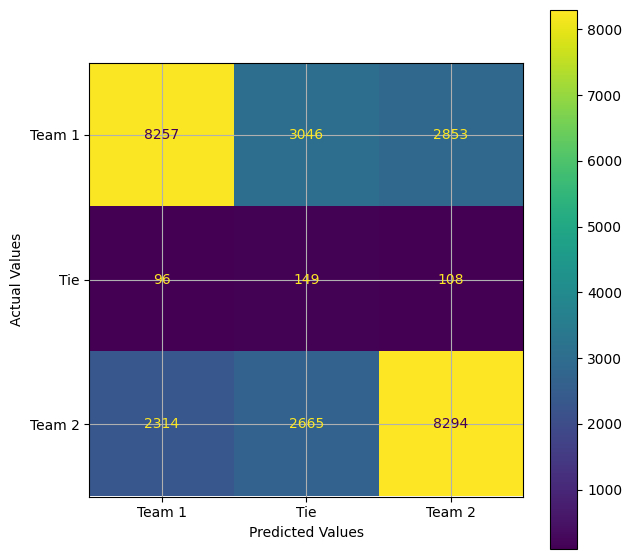

              precision    recall  f1-score   support

      Team 1       0.77      0.58      0.67     14156
         Tie       0.03      0.42      0.05       353
      Team 2       0.74      0.62      0.68     13273

    accuracy                           0.60     27782
   macro avg       0.51      0.54      0.46     27782
weighted avg       0.75      0.60      0.66     27782



In [ ]:
##SS and SMOTE data

start_time = time.time()

model = SVC(kernel="linear", random_state=7)
model.fit(X_ss_train, y_ss_train)

model_train_score = model.score(X_ss_train, y_ss_train)
model_test_score = model.score(X_ss_test, y_ss_test)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training score: {model_train_score}, Testing score: {model_test_score}, Time to train: {elapsed_time} seconds" )

y_pred = model.predict(X_ss_test)

cm = confusion_matrix(y_ss_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.grid(False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_ss_test, y_pred, target_names=labels))

Training score: 0.5391969148997241, Testing score: 0.6042761500251962, Time to train: 11449.374498128891 seconds


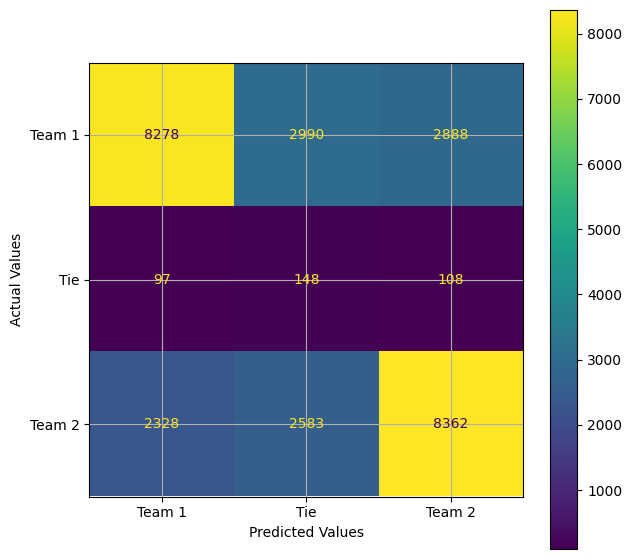

              precision    recall  f1-score   support

      Team 1       0.77      0.58      0.67     14156
         Tie       0.03      0.42      0.05       353
      Team 2       0.74      0.63      0.68     13273

    accuracy                           0.60     27782
   macro avg       0.51      0.54      0.46     27782
weighted avg       0.75      0.60      0.66     27782



In [ ]:
##MM and SMOTE data
model = SVC(kernel="linear", random_state=7)
model.fit(X_mm_train, y_mm_train)

model_train_score = model.score(X_mm_train, y_mm_train)
model_test_score = model.score(X_mm_test, y_mm_test)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training score: {model_train_score}, Testing score: {model_test_score}, Time to train: {elapsed_time} seconds" )

y_pred = model.predict(X_mm_test)

cm = confusion_matrix(y_mm_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.grid(False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_mm_test, y_pred, target_names=labels))

Seems to have slight underfitting, and data unlikely to be linearly separable

In [ ]:
sdgdfg

NameError: name 'sdgdfg' is not defined

How do we choose whether MinMax, SS or Log is best?

In [15]:
k_list = ['rbf', 'sigmoid']
#Not poly because it takes so long and not linear as relationship isn't linear (see SVM above)
gamma_list = [0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 750]
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400, 500]

In [17]:
print("MM")
best_accuracy = 0
best_loss = 100

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:

            start_time = time.time()
            
            # for each combination of parameters, train an SVC
            model = SVC(kernel=k, gamma=gamma, C=c, random_state=7)
            model.fit(X_mm_train_sample, y_mm_train_sample)
            y_train_pred = model.predict(X_mm_train_sample)
            y_val_pred = model.predict(X_mm_val_sample)

            train_accuracy = accuracy_score(y_mm_train_sample, y_train_pred)
            val_accuracy = accuracy_score(y_mm_val_sample, y_val_pred)

            train_loss = hinge_loss(y_mm_train_sample, model.decision_function(X_mm_train_sample))
            val_loss = hinge_loss(y_mm_val_sample, model.decision_function(X_mm_val_sample))

            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{k}, Gamma: {gamma}, C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time to train: {elapsed_time} seconds")


            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_acc_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

            if val_loss < best_loss:
                best_loss = val_loss
                best_loss_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print(f"Best accuracy is: {best_accuracy} and best parameters are {best_acc_parameters}")
print(f"Best loss is: {best_loss} and best parameters are {best_loss_parameters}")

MM
rbf, Gamma: 0.001, C: 0.001, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8576226335393367, Validation Loss: 2.791359803504446, Time to train: 50.753623723983765 seconds
rbf, Gamma: 0.001, C: 0.01, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8571445789832777, Validation Loss: 2.7906726867587723, Time to train: 50.8405704498291 seconds
rbf, Gamma: 0.001, C: 0.1, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8510578632129342, Validation Loss: 2.7817836178691553, Time to train: 48.626461029052734 seconds
rbf, Gamma: 0.001, C: 1, Train Accuracy: 0.5135080372821829, Validation Accuracy: 0.5637149028077754, Train Loss: 1.2537296194095442, Validation Loss: 1.2348191809569784, Time to train: 48.09118628501892 seconds
rbf, Gamma: 0.001, C: 10, Train Accuracy: 0.5340402539511009, Validation Accuracy: 0.5971922246220303, Train Loss: 1.19727511912489

In [18]:
print("SS")
best_accuracy = 0
best_loss = 100

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:

            start_time = time.time()
            
            # for each combination of parameters, train an SVC
            model = SVC(kernel=k, gamma=gamma, C=c, random_state=7)
            model.fit(X_ss_train_sample, y_ss_train_sample)
            y_train_pred = model.predict(X_ss_train_sample)
            y_val_pred = model.predict(X_ss_val_sample)

            train_accuracy = accuracy_score(y_ss_train_sample, y_train_pred)
            val_accuracy = accuracy_score(y_ss_val_sample, y_val_pred)

            train_loss = hinge_loss(y_ss_train_sample, model.decision_function(X_ss_train_sample))
            val_loss = hinge_loss(y_ss_val_sample, model.decision_function(X_ss_val_sample))

            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{k}, Gamma: {gamma}, C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time to train: {elapsed_time} seconds")
            
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_acc_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

            if val_loss < best_loss:
                best_loss = val_loss
                best_loss_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print(f"Best accuracy is: {best_accuracy} and best parameters are {best_acc_parameters}")
print(f"Best loss is: {best_loss} and best parameters are {best_loss_parameters}")

SS
rbf, Gamma: 0.001, C: 0.001, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8567259968907486, Validation Loss: 2.7900798351914773, Time to train: 54.668997287750244 seconds
rbf, Gamma: 0.001, C: 0.01, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8393406770820142, Validation Loss: 2.7643840962963013, Time to train: 52.72057366371155 seconds
rbf, Gamma: 0.001, C: 0.1, Train Accuracy: 0.5065513980818587, Validation Accuracy: 0.6227501799856011, Train Loss: 1.259814439886818, Validation Loss: 1.103762281245536, Time to train: 49.92802548408508 seconds
rbf, Gamma: 0.001, C: 1, Train Accuracy: 0.548966635147913, Validation Accuracy: 0.6184305255579554, Train Loss: 1.17469213580186, Validation Loss: 1.0736575031281195, Time to train: 47.11631393432617 seconds
rbf, Gamma: 0.001, C: 10, Train Accuracy: 0.5651087397001215, Validation Accuracy: 0.6123110151187905, Train Loss: 1.119454049607681, Vali

In [19]:
print("SS with Feature Selection Pearson's Correlation")
best_accuracy = 0
best_loss = 100

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:

            start_time = time.time()
            
            # for each combination of parameters, train an SVC
            model = SVC(kernel=k, gamma=gamma, C=c, random_state=7)
            model.fit(X_ss_corr_train_sample, y_ss_corr_train_sample)
            y_train_pred = model.predict(X_ss_corr_train_sample)
            y_val_pred = model.predict(X_ss_corr_val_sample)

            train_accuracy = accuracy_score(y_ss_corr_train_sample, y_train_pred)
            val_accuracy = accuracy_score(y_ss_corr_val_sample, y_val_pred)

            train_loss = hinge_loss(y_ss_corr_train_sample, model.decision_function(X_ss_corr_train_sample))
            val_loss = hinge_loss(y_ss_corr_val_sample, model.decision_function(X_ss_corr_val_sample))

            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{k}, Gamma: {gamma}, C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time to train: {elapsed_time} seconds")

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_acc_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

            if val_loss < best_loss:
                best_loss = val_loss
                best_loss_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print(f"Best accuracy is: {best_accuracy} and best parameters are {best_acc_parameters}")
print(f"Best loss is: {best_loss} and best parameters are {best_loss_parameters}")

SS with Feature Selection Pearson's Correlation
rbf, Gamma: 0.001, C: 0.001, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8568354700187013, Validation Loss: 2.7902013250265707, Time to train: 52.39489197731018 seconds
rbf, Gamma: 0.001, C: 0.01, Train Accuracy: 0.34053761988383086, Validation Accuracy: 0.009359251259899209, Train Loss: 1.8461696202771654, Validation Loss: 2.7743440659727137, Time to train: 51.91655254364014 seconds
rbf, Gamma: 0.001, C: 0.1, Train Accuracy: 0.4958800486289342, Validation Accuracy: 0.5914326853851691, Train Loss: 1.2987045721287334, Validation Loss: 1.1673487103255822, Time to train: 51.08438277244568 seconds
rbf, Gamma: 0.001, C: 1, Train Accuracy: 0.5361339997298392, Validation Accuracy: 0.6108711303095752, Train Loss: 1.20864892166133, Validation Loss: 1.0989270298237512, Time to train: 47.38788390159607 seconds
rbf, Gamma: 0.001, C: 10, Train Accuracy: 0.5464001080642983, Validation Accuracy: 0.622390

In [ ]:
#Feature selected rf
print("SS With Feature Selection RF")
best_accuracy = 0
best_loss = 100

for k in k_list:
    for gamma in gamma_list:
        for c in c_list:

            start_time = time.time()
            
            # for each combination of parameters, train an SVC
            model = SVC(kernel=k, gamma=gamma, C=c, random_state=7)
            model.fit(X_ss_rf_train_sample, y_ss_rf_train_sample)
            y_train_pred = model.predict(X_ss_rf_train_sample)
            y_val_pred = model.predict(X_ss_rf_val_sample)

            train_accuracy = accuracy_score(y_ss_rf_train_sample, y_train_pred)
            val_accuracy = accuracy_score(y_ss_rf_val_sample, y_val_pred)

            train_loss = hinge_loss(y_ss_rf_train_sample, model.decision_function(X_ss_rf_train_sample))
            val_loss = hinge_loss(y_ss_rf_val_sample, model.decision_function(X_ss_rf_val_sample))

            end_time = time.time()
            elapsed_time = end_time - start_time

            print(f"{k}, Gamma: {gamma}, C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Time to train: {elapsed_time} seconds")


            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_acc_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

            if val_loss < best_loss:
                best_loss = val_loss
                best_loss_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print(f"Best accuracy is: {best_accuracy} and best parameters are {best_acc_parameters}")
print(f"Best loss is: {best_loss} and best parameters are {best_loss_parameters}")

In [ ]:
gkhjhk

TUNING HYPERPARAMETERS FURTHER

Use the best combination for ss data
Best parameters for SS non feature selection: {'C': 200, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
g_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4,2.5, 2.6, 2.7, 2.8]

In [ ]:
best_accuracy=0
best_loss = 100
c_list= []
g_list=[]
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

for c in range(100, 301, 10):
    for g in g_list:
        c_list.append(c)

        model = SVC(kernel='rbf', gamma=1, C=c, random_state = 7)
        model.fit(X_ss_train_sample, y_ss_train_sample)

        #Training accuracy and loss
        y_train_pred = model.predict(X_ss_train_sample)
        train_accuracy = accuracy_score(y_ss_train_sample, y_train_pred)
        train_acc_list.append(train_accuracy)

        #Need the probability rather than predicted class
        train_loss = log_loss(y_ss_train_sample, model.predict_proba(X_ss_train_sample))
        train_loss_list.append(train_loss)

        #Validation accuracy and loss
        y_val_pred = model.predict(X_ss_val_sample)
        val_accuracy = accuracy_score(y_ss_val_sample, y_val_pred)
        val_acc_list.append(val_accuracy)

        val_loss = log_loss(y_ss_val_sample, model.predict_proba(X_val))
        val_loss_list.append(val_loss)

        print(f"{c} C, {g} Gamma, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
        print(f"{c} C, {g} Gamma, Train Loss: {train_loss}, Validation Accuracy: {val_loss}")


    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_acc_c = c
        best_acc_g=g

    if val_loss< best_loss:
        best_loss = val_loss
        best_loss_c = c
        best_loss_g=g


print(f"Best accuracy is: {best_accuracy}, C is {best_acc_c} and Gamma is {best_acc_g}")
print(f"Best accuracy is: {best_loss}, C is {best_loss_c} and Gamma is {best_loss_g}")

acc_df = pd.DataFrame({'C': c_list,'Gamma': g_list, 'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})
loss_df = pd.DataFrame({'C': c_list,'Gamma': g_list,'Train Loss': train_loss_list, 'Validation Loss': val_loss_list})

plt.figure(figsize=(15, 6))

plt.subplot(221)
plt.title('Accuracy Learning Curve')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(acc_df['C'], acc_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(acc_df['C'], acc_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()

plt.subplot(222)
plt.title('Loss Learning Curve')
plt.xlabel('C')
plt.ylabel('Loss')
plt.plot(loss_df['C'], loss_df['Train Loss'], label='Training Loss', color='green', marker='o')
plt.plot(loss_df['C'], loss_df['Validation Loss'], label='Validation Loss', color='purple', marker='o')
plt.legend()
 
plt.subplot(223)
plt.title('Accuracy Learning Curve')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.plot(acc_df['Gamma'], acc_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(acc_df['Gamma'], acc_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()

plt.subplot(224)
plt.title('Loss Learning Curve')
plt.xlabel('Gamma')
plt.ylabel('Loss')
plt.plot(loss_df['Gamma'], loss_df['Train Loss'], label='Training Loss', color='green', marker='o')
plt.plot(loss_df['Gamma'], loss_df['Validation Loss'], label='Validation Loss', color='purple', marker='o')
plt.legend()
 
plt.suptitle("SVM Learning Curve")
plt.show()

C: 10, Gamma: 0.1, Train Accuracy: 0.7914178586307458, Validation Accuracy: 0.6939304219096966
C: 10, Gamma: 0.2, Train Accuracy: 0.8341202610748507, Validation Accuracy: 0.729459659511473
C: 10, Gamma: 0.3, Train Accuracy: 0.8559922233023192, Validation Accuracy: 0.7483345669874167
C: 10, Gamma: 0.4, Train Accuracy: 0.8732814886821275, Validation Accuracy: 0.7709104367135455
C: 10, Gamma: 0.5, Train Accuracy: 0.8891126232467713, Validation Accuracy: 0.7834937083641746
C: 10, Gamma: 0.6, Train Accuracy: 0.9019580613803638, Validation Accuracy: 0.7853441894892672
C: 10, Gamma: 0.7, Train Accuracy: 0.9098736286626857, Validation Accuracy: 0.7923760177646189
C: 10, Gamma: 0.8, Train Accuracy: 0.9183446743507846, Validation Accuracy: 0.7979274611398963
C: 10, Gamma: 0.9, Train Accuracy: 0.9268157200388835, Validation Accuracy: 0.8023686158401184
C: 10, Gamma: 1, Train Accuracy: 0.9327871129009859, Validation Accuracy: 0.807920059215396
C: 10, Gamma: 1.1, Train Accuracy: 0.9383418969587557,

C: 10, Train Accuracy: 0.9327871129009859, Validation Accuracy: 0.807920059215396
C: 20, Train Accuracy: 0.94535481183169, Validation Accuracy: 0.8097705403404886
C: 30, Train Accuracy: 0.9511873350923483, Validation Accuracy: 0.8105107327905255
C: 40, Train Accuracy: 0.9557005971392862, Validation Accuracy: 0.8097705403404886
C: 50, Train Accuracy: 0.9585474239688933, Validation Accuracy: 0.8097705403404886
C: 60, Train Accuracy: 0.9615331203999444, Validation Accuracy: 0.8082901554404145
C: 70, Train Accuracy: 0.9629218164143869, Validation Accuracy: 0.8090303478904515
C: 80, Train Accuracy: 0.9647271212331621, Validation Accuracy: 0.807179866765359
C: 90, Train Accuracy: 0.9659075128454382, Validation Accuracy: 0.8090303478904515
C: 100, Train Accuracy: 0.9669490348562699, Validation Accuracy: 0.811621021465581
C: 110, Train Accuracy: 0.9676433828634912, Validation Accuracy: 0.810880829015544
C: 120, Train Accuracy: 0.9685460352728787, Validation Accuracy: 0.8112509252405625
C: 130,

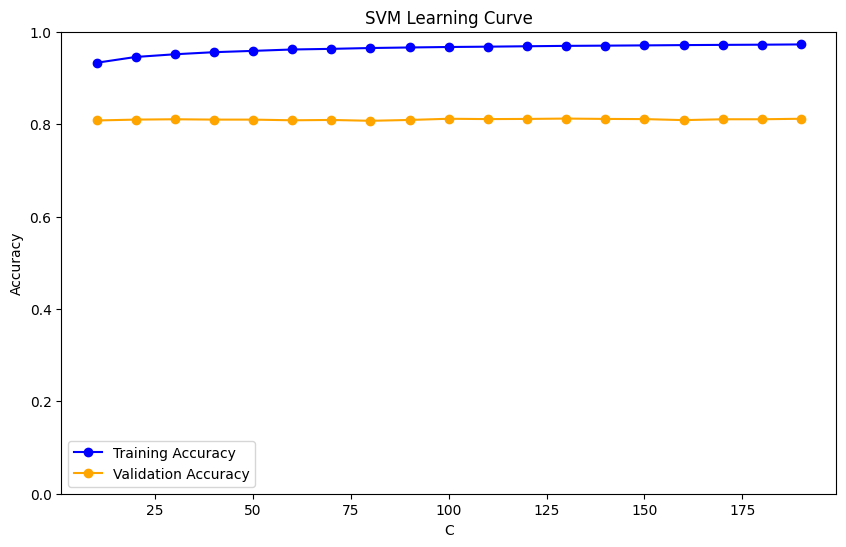

In [ ]:
best_accuracy=0
cs= []
train_acc_list = []
val_acc_list = []
for c in range(10, 200, 10):
    cs.append(c)
            
    model = SVC(kernel='rbf', gamma=1, C=c, random_state = 7)
    model.fit(X_ss_train_sample, y_ss_train_sample)


    y_train_pred = model.predict(X_ss_train_sample)
    y_val_pred = model.predict(X_ss_val_sample)
 
    train_accuracy = accuracy_score(y_ss_train_sample, y_train_pred)
    val_accuracy = accuracy_score(y_ss_val_sample, y_val_pred)
    train_acc_list.append(train_accuracy)
    val_acc_list.append(val_accuracy)

    print(f"C: {c}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
        # if we got a better score, store the score and parameters
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_c = c

print("Best score: {:.2f}".format(best_accuracy))
print("Best C: {best_c}")
    
cs_df = pd.DataFrame({'C': cs, 'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

print(f"Best validation accuracy is: {best_accuracy} and C is {best_c}")

plt.figure(figsize=(10, 6))
plt.title('SVM Learning Curve')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.plot(cs_df['C'], cs_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(cs_df['C'], cs_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [ ]:
cs_df

NameError: name 'cs_df' is not defined

TUNED C, have the kernel already and now train 

In [ ]:
g_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4,2.5, 2.6, 2.7, 2.8]

Gamma: 0.1, Train Accuracy: 0.8157894736842105, Validation Accuracy: 0.7139156180606958
Gamma: 0.2, Train Accuracy: 0.8501597000416609, Validation Accuracy: 0.7427831236121392
Gamma: 0.3, Train Accuracy: 0.8757811415081239, Validation Accuracy: 0.7698001480384901
Gamma: 0.4, Train Accuracy: 0.8943202333009305, Validation Accuracy: 0.7879348630643968
Gamma: 0.5, Train Accuracy: 0.9090404110540202, Validation Accuracy: 0.7894152479644707
Gamma: 0.6, Train Accuracy: 0.9209831967782253, Validation Accuracy: 0.7960769800148039
Gamma: 0.7, Train Accuracy: 0.9307040688793223, Validation Accuracy: 0.801258327165063
Gamma: 0.8, Train Accuracy: 0.9397305929731982, Validation Accuracy: 0.8082901554404145
Gamma: 0.9, Train Accuracy: 0.9457019858353006, Validation Accuracy: 0.808660251665433
Gamma: 1, Train Accuracy: 0.9511873350923483, Validation Accuracy: 0.8105107327905255
Gamma: 1.1, Train Accuracy: 0.9564643799472295, Validation Accuracy: 0.8112509252405625
Gamma: 1.2, Train Accuracy: 0.961255

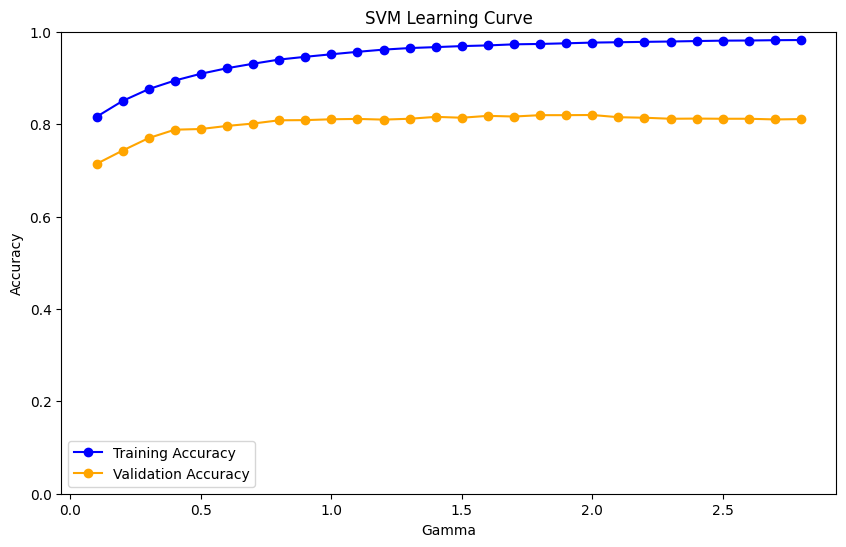

In [ ]:
best_accuracy=0
gamma_list= []
train_acc_list = []
val_acc_list = []
for g in g_list:
    gamma_list.append(g)
            
    model = SVC(kernel='rbf', gamma=g, C=30, random_state = 7)
    model.fit(X_ss_train_sample, y_ss_train_sample)


    y_train_pred = model.predict(X_ss_train_sample)
    y_val_pred = model.predict(X_ss_val_sample)
 
    train_accuracy = accuracy_score(y_ss_train_sample, y_train_pred)
    val_accuracy = accuracy_score(y_ss_val_sample, y_val_pred)
    train_acc_list.append(train_accuracy)
    val_acc_list.append(val_accuracy)

    print(f"Gamma: {g}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
        # if we got a better score, store the score and parameters
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_g = g

print("Best score: {:.2f}".format(best_accuracy))
print("Best Gamma: {best_g}")
    
gamma_df = pd.DataFrame({'Gamma': gamma_list, 'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

print(f"Best accuracy is: {best_accuracy} and estimators is {best_g}")

plt.figure(figsize=(10, 6))
plt.title('SVM Learning Curve')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.plot(gamma_df['Gamma'], gamma_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(gamma_df['Gamma'], gamma_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.ylim(0, 1)
plt.legend()
plt.show()

Train Accuracy: 0.9762539129377679, Val Accuracy: 0.9546640750139481, Test Accuracy: 0.9475199769635015


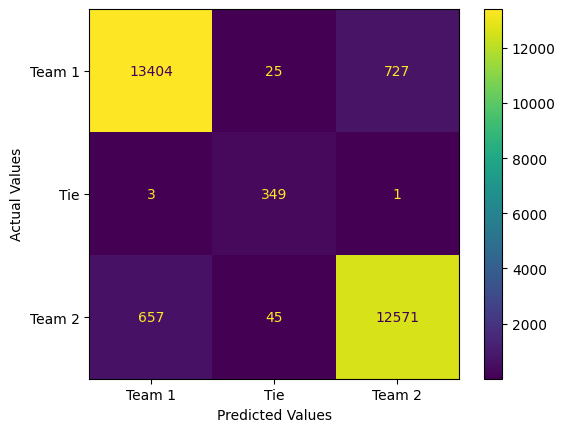

              precision    recall  f1-score   support

      Team 1       0.95      0.95      0.95     14156
         Tie       0.83      0.99      0.90       353
      Team 2       0.95      0.95      0.95     13273

    accuracy                           0.95     27782
   macro avg       0.91      0.96      0.93     27782
weighted avg       0.95      0.95      0.95     27782



In [ ]:
#Best parameters: {'C': 300, 'gamma': 10, 'kernel': 'rbf'}

final_model= SVC(kernel="rbf", random_state=7, C=300, gamma=10)
final_model.fit(X_ss_train, y_ss_train)

y_train_pred = final_model.predict(X_ss_train)
y_val_pred = final_model.predict(X_ss_val)
y_test_pred = final_model.predict(X_ss_test)

# Model Accuracy: how often is the classifier correct?
print(f"Train Accuracy: {accuracy_score(y_ss_train, y_train_pred)}, Val Accuracy: {accuracy_score(y_ss_val, y_val_pred)}, Test Accuracy: {accuracy_score(y_ss_test, y_test_pred)}")


cm = confusion_matrix(y_ss_test, y_test_pred, labels=final_model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.grid(False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_ss_test, y_test_pred, target_names=labels))

Train Accuracy: 0.9555605082851286, Val Accuracy: 0.9218724690891421, Test Accuracy: 0.9127492621121589


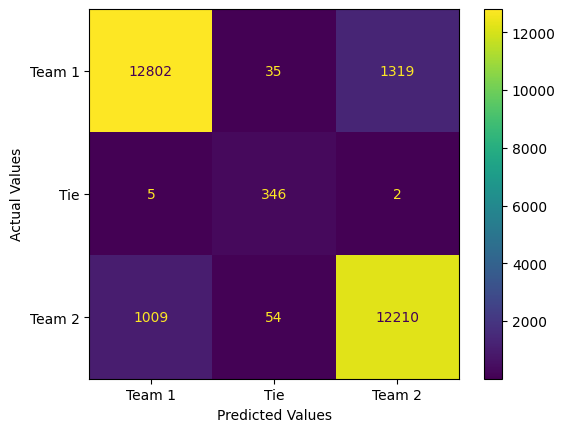

              precision    recall  f1-score   support

      Team 1       0.93      0.90      0.92     14156
         Tie       0.80      0.98      0.88       353
      Team 2       0.90      0.92      0.91     13273

    accuracy                           0.91     27782
   macro avg       0.87      0.93      0.90     27782
weighted avg       0.91      0.91      0.91     27782



In [ ]:
#X_ss_corr_train, X_ss_corr_test, X_ss_corr_val, y_ss_corr_train, y_ss_corr_test, y_ss_corr_val 

#Best parameters: {'C': 300, 'gamma': 10, 'kernel': 'rbf'}

final_model= SVC(kernel="rbf", random_state=7, C=300, gamma=10)
final_model.fit(X_ss_corr_train, y_ss_corr_train)

y_train_pred = final_model.predict(X_ss_corr_train)
y_val_pred = final_model.predict(X_ss_corr_val)
y_test_pred = final_model.predict(X_ss_corr_test)

# Model Accuracy: how often is the classifier correct?
print(f"Train Accuracy: {accuracy_score(y_ss_corr_train, y_train_pred)}, Val Accuracy: {accuracy_score(y_ss_corr_val, y_val_pred)}, Test Accuracy: {accuracy_score(y_ss_corr_test, y_test_pred)}")


cm = confusion_matrix(y_ss_test, y_test_pred, labels=final_model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.grid(False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_ss_corr_test, y_test_pred, target_names=labels))

In [ ]:
y_test_pred_list  = []
for y in y_test_pred:
    if y==0:
        y_test_pred_list.append("Team 1")
    elif y == 2:
        y_test_pred_list.append("Team 2")
    elif y==1:
        y_test_pred_list.append("Tie")

y_test_pred_df = pd.DataFrame(y_test_pred_list, columns=["Winner Bat First"])

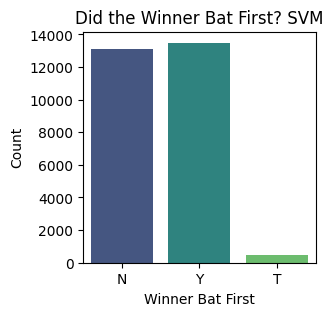

In [ ]:
plt.figure(figsize=(3, 3))
sns.countplot(x='Winner Bat First', data=y_test_pred_df, palette='viridis')

# Adding labels and title
plt.ylabel('Count')
plt.title('Did the Winner Bat First? SVM')
plt.show()

In [ ]:
sdfsdf

N: 1, Train Accuracy 0.9341063741147063, Validation Accuracy: 0.7657290895632864
N: 101, Train Accuracy 0.9916678239133454, Validation Accuracy: 0.8082901554404145
N: 201, Train Accuracy 0.9915289543119011, Validation Accuracy: 0.8090303478904515
N: 301, Train Accuracy 0.9919455631162338, Validation Accuracy: 0.8112509252405625
N: 401, Train Accuracy 0.992014997916956, Validation Accuracy: 0.8119911176905995
N: 501, Train Accuracy 0.9919455631162338, Validation Accuracy: 0.8123612139156181
N: 601, Train Accuracy 0.9918761283155118, Validation Accuracy: 0.8131014063656551
N: 701, Train Accuracy 0.9918761283155118, Validation Accuracy: 0.8134715025906736
N: 801, Train Accuracy 0.9919455631162338, Validation Accuracy: 0.8138415988156921
N: 901, Train Accuracy 0.9919455631162338, Validation Accuracy: 0.8134715025906736
N: 1001, Train Accuracy 0.992014997916956, Validation Accuracy: 0.8138415988156921
Best score: 0.81
Best Gamma: {best_g}
Best accuracy is: 0.8138415988156921 and estimators 

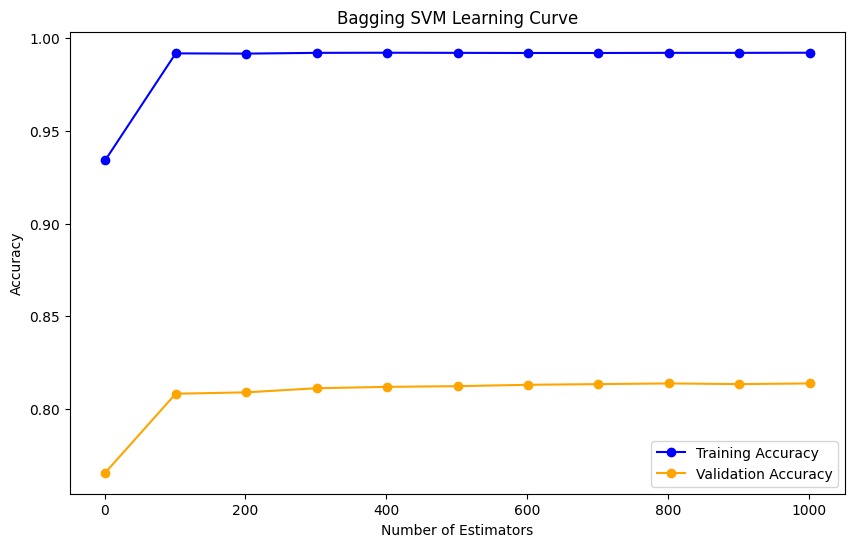

In [ ]:
from sklearn.ensemble import BaggingClassifier

best_accuracy=0
n_list= []
train_acc_list = []
val_acc_list = []

model = SVC(kernel='rbf', gamma=g, C=130, random_state = 7)
model.fit(X_ss_train_sample, y_ss_train_sample)

for n in range(1, 1002, 100):
    n_list.append(n)
    bagging_model = BaggingClassifier(estimator=model, n_estimators=n, random_state=7)
    bagging_model.fit(X_ss_train_sample, y_ss_train_sample)


    y_train_pred = bagging_model.predict(X_ss_train_sample)
    y_val_pred= bagging_model.predict(X_ss_val_sample)
    train_accuracy = accuracy_score(y_ss_train_sample, y_train_pred)
    val_accuracy = accuracy_score(y_ss_val_sample, y_val_pred)

    train_acc_list.append(train_accuracy)
    val_acc_list.append(val_accuracy)

    print(f"N: {n}, Train Accuracy {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_n = n

print("Best score: {:.2f}".format(best_accuracy))
print("Best Gamma: {best_g}")
    
n_df = pd.DataFrame({'Num Estimators': n_list, 'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})
print(f"Best accuracy is: {best_accuracy} and estimators is {best_n}")

plt.figure(figsize=(10, 6))
plt.title('Bagging SVM Learning Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.plot(n_df['Num Estimators'], n_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(n_df['Num Estimators'], n_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

In [ ]:
n_df

,Num Estimators,Train Accuracy,Validation Accuracy
0,1,0.934106,0.765729
1,101,0.991668,0.808290
2,201,0.991529,0.809030
3,301,0.991946,0.811251
4,401,0.992015,0.811991
5,501,0.991946,0.812361
6,601,0.991876,0.813101
7,701,0.991876,0.813472
8,801,0.991946,0.813842
9,901,0.991946,0.813472


https://datascience.stackexchange.com/questions/66216/gridsearch-without-cv

Autoencoder

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

In [ ]:
k_list = ['linear', 'rbf', 'sigmoid']
gamma_list = [0.001, 0.01, 0.1, 1, 10, 100,200, 300]
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300]

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the architecture of the autoencoder
input_dim = X_ss_train_sample.shape[1]
encoding_dim = 10  # You can adjust this based on your preference

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the autoencoder
autoencoder.fit(X_ss_train_sample, X_ss_train_sample, epochs=50, batch_size=32, shuffle=True, validation_data=(X_ss_test_sample, X_ss_test_sample))

# Extract features using the encoder part of the autoencoder
encoder = Model(input_layer, encoded)
encoded_features_train = encoder.predict(X_ss_train_sample)
encoded_features_test = encoder.predict(X_ss_test_sample)

best_accuracy = 0
# Now use SVM as the classifier
for k in k_list:
    for c in c_list:
        for g in gamma_list:
            svm_classifier = SVC(C=c, gamma=g, kernel=k, random_state=7)  # You can adjust the kernel and C parameter based on your preference
            svm_classifier.fit(encoded_features_train, y_ss_train_sample)

            # Predict on the test set
            svm_predictions = svm_classifier.predict(encoded_features_test)

            # Evaluate accuracy
            accuracy = accuracy_score(y_ss_test_sample, svm_predictions)
            print(f'Kernel: {k}, C: {c}, Gamma: {g}, SVM Accuracy: {accuracy}')


            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': gamma, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

In [ ]:
k_list = ['rbf']
gamma_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
c_list = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the architecture of the autoencoder
input_dim = X_ss_train_sample.shape[1]
encoding_dim = 10  # You can adjust this based on your preference

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the autoencoder
autoencoder.fit(X_ss_train_sample, X_ss_train_sample, epochs=50, batch_size=32, shuffle=True, validation_data=(X_ss_test_sample, X_ss_test_sample))

# Extract features using the encoder part of the autoencoder
encoder = Model(input_layer, encoded)
encoded_features_train = encoder.predict(X_ss_train_sample)
encoded_features_test = encoder.predict(X_ss_test_sample)

best_accuracy = 0
# Now use SVM as the classifier
for k in k_list:
    for c in c_list:
        for g in gamma_list:
            svm_classifier = SVC(C=c, gamma=g, kernel=k, random_state=7)  # You can adjust the kernel and C parameter based on your preference
            svm_classifier.fit(encoded_features_train, y_ss_train_sample)

            # Predict on the test set
            svm_predictions = svm_classifier.predict(encoded_features_test)

            # Evaluate accuracy
            accuracy = accuracy_score(y_ss_test_sample, svm_predictions)
            print(f'Kernel: {k}, C: {c}, Gamma: {g}, SVM Accuracy: {accuracy}')


            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': g, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 603, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 1909, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\carth\AppData\Local\Temp\ipykernel_1396\438131127.py", line 25, in <module>

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,8] and labels shape [256]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2140]

In [ ]:
k_list = ['linear', 'rbf', 'sigmoid']
gamma_list = [0.001, 0.01, 0.1, 1, 10, 100,200, 300]
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300]

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from keras import regularizers
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the architecture of the autoencoder
input_dim = X_ss_train_sample.shape[1]
encoding_dim = 10  # You can adjust this based on your preference

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the autoencoder
autoencoder.fit(X_ss_train_sample, X_ss_train_sample, epochs=150, batch_size=32, shuffle=True, validation_data=(X_ss_test_sample, X_ss_test_sample))

# Extract features using the encoder part of the autoencoder
encoder = Model(input_layer, encoded)
encoded_features_train = encoder.predict(X_ss_train_sample)
encoded_features_test = encoder.predict(X_ss_test_sample)

best_accuracy = 0
# Now use SVM as the classifier
for k in k_list:
    for c in c_list:
        for g in gamma_list:
            svm_classifier = SVC(C=c, gamma=g, kernel=k, random_state=7)  # You can adjust the kernel and C parameter based on your preference
            svm_classifier.fit(encoded_features_train, y_ss_train_sample)

            # Predict on the test set
            svm_predictions = svm_classifier.predict(encoded_features_test)

            # Evaluate accuracy
            accuracy = accuracy_score(y_ss_test_sample, svm_predictions)
            print(f'Kernel: {k}, C: {c}, Gamma: {g}, SVM Accuracy: {accuracy}')


            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {'C': c, 'gamma': g, 'kernel': k}

print("Best score: {:.2f}".format(best_accuracy))
print("Best parameters: {}".format(best_parameters))